# I. Gradient Descent untuk Regresi Logistik

**Tujuan Pembelajaran:** mampu mengimplementasikan algoritma Gradient Descent Regresi Logistik untuk Klasifikasi.

Dalam tugas ini, Anda akan diberikan sebuah data dummy untuk tugas klasifikasi. Buatlah algoritma Gradient Descent untuk membuat model prediksi label.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv('data_logistic.txt', names = ['x1', 'x2', 'Class'])
display(data)

,x1,x2,Class
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## Melakukan visualisasi Data

Untuk memberikan gambaran mengenai sebaran data yang diberikan, kita dapat menggunakan fitur Seaborn untuk menggambar scatter plot dari data ```x1``` dan ```x2``` yang dibedakan warnanya berdasarkan labelnya pada kolom ```y```.

<AxesSubplot:xlabel='x1', ylabel='x2'>

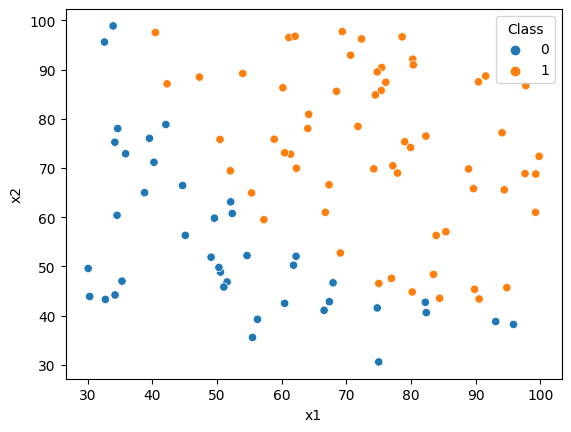

In [4]:
sns.scatterplot(x="x1", y="x2", hue='Class', data=data)

## Membangun model dengan Gradient Descent

Buatlah model regresi logistik (cari nilai parameter theta) untuk data yang diberikan dengan mengisi bagian yang kosong pada kode di bawah ini.

In [5]:
# X adalah matriks data latih/variabel input
# y adalah vektor label/variabel output

# X = np.array(data[["x1", "x2"]].values.tolist())
# y = np.array(data[["Class"]].values.tolist())
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X)
print(y)
### isi kode di sini ###


[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

In [6]:
# Logistic Regression Grad Descent

# pilih nilai hyperparameter yang sesuai
numIterations = 330000
alpha = 1e-3

# catatan: untuk mempersingkat waktu komputasi, fungsi cukup 
#          me-return nilai theta yang terkini saja; 
#          tidak perlu simpan semua kronologisnya.

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def GradDescLogistic(X, y, numIterations, alpha):
    X = np.insert(X, 0, 1, axis=1)
    m, n = np.shape(X)
    theta = np.zeros(n)
    
    # isi kode di sini
    for i in range(numIterations):
        theta = theta - alpha * (1/m) * X.T.dot(sigmoid(X.dot(theta)) - y)
    return theta

theta = GradDescLogistic(X, y, numIterations, alpha)
print(theta)

[-9.7038345   0.08313243  0.07685586]


## Membangun visualisasi Hasil Prediksi

Untuk memberikan gambaran mengenai hasil model, kita dapat menggambar scatter plot yang sama dengan ditambah kurva '*boundary decision*'. Pada gambar di bawah ini, garis berwarna hijau menunjukkan batas yang membedakan antara 'wilayah' kelas 0 dan 'wilayah' kelas 1. Sebagai ilustrasi, titik berwarna oranye di bawah garis hijau menandakan False Positive, karena label yang benar adalah 1, namun model memutuskan bahwa titik tersebut masuk dalam wilayah kelas 0.

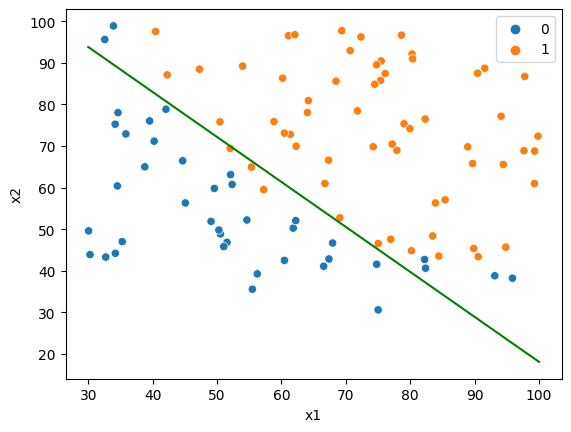

In [7]:
[theta0, theta1, theta2] = theta
m = -theta1 / theta2
b = -theta0 / theta2

def boundary(x, m, b):
    return m*x + b

x_plot = np.linspace(30, 100, 1000)
y_plot = boundary(x_plot, m, b)
data_boundary = pd.DataFrame({"x": x_plot, "y": y_plot})

p1 = sns.scatterplot(x="x1", y="x2", hue='Class', data=data)
p2 = sns.lineplot(data=data_boundary, x='x', y='y', color='g')

## Membuat Confusion Matrix

Untuk mengevaluasi keberhasilan model yang sudah dibuat, buatlah Confusion Matrixnya. Setelah confusion matrix dihitung, maka ukuran performansi lainnya dapat dibuat, seperti accuracy, precision, recall, dan F1.

In [8]:
def predict(x, theta):
    X = np.insert(x, 0, 1, axis=1)
    z = np.dot(X, theta)
    y_pred = 1 / (1 + np.exp(-z))
    return y_pred
    
probability = (predict(X, theta))
y_pred = []
for i in range(len(probability)):
    if probability[i] < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)


In [9]:
# y_true adalah vektor yang berisi label yang sesungguhnya (dari data latih)
# y_pred adalah vektor yang berisi label dari hasil prediksi model

y_true = list(y)
print(f"y_true = {y_true}")
y_pred = y_pred
print(f"y_pred = {y_pred}")


def create_confusion_matrix(y_true, y_pred):
    TP = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    FN = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)
    FP = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    TN = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 0)
    return [[TP, FP], [FN, TN]]

c_mat = create_confusion_matrix(y, y_pred)
[[TP, FN], [FP, TN]] = c_mat

# Menghitung berbagai ukuran performansi model
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, F1)

y_true = [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
0.91 0.95 0.9047619047619048 0.9268292682926829


# II. Klasifikasi Multikelas

**Tujuan Pembelajaran:** mampu menggunakan sklearn untuk menerapkan tugas klasifikasi multikelas terhadap data nyata.

Dalam halaman ini, modul akan mendemonstrasikan penggunaan library sklearn untuk suatu dataset Iris yang sangat terkenal dan klasik. Sementara itu, Anda akan diberikan sebuah data latih untuk klasifikasi biji kedelai. Anda diminta untuk **mereplikasi langkah-langkah yang dicontohkan untuk diterapkan ke dataset biji kedelai**. Gantilah code di bawah ini beserta dengan penjelasannya menjadi sesuai untuk kasus biji kedelai.

Credit Dataset:

KOKLU, M. and OZKAN, I.A., (2020), "*Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.*" Computers and Electronics in Agriculture, 174, 105507.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

## Memuat Dataset

In [11]:
from sklearn import datasets
# dataset Iris tersedia di library sklearn karena sudah sangat klasik.

# load dataset
iris = datasets.load_iris()

# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
X = iris.data
display(df)

# Notes:
# the labels 0, 1, 2 at "target" column represent Iris species ‘setosa’, ‘versicolor’, and ‘virginica’, respectively.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
# dataset drybeans
data = pd.read_csv('Dry_Beans_Dataset.csv')
display(data)

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## Mempersiapkan Data Latih dan Data Uji

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(["target"], axis = 1)
y = df[["target"]]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
display(X_train)
display(y_train)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


,target
91,1
135,2
69,1
128,2
114,2
...,...
133,2
137,2
72,1
140,2


## Membangun Model Klasifikasi

In [14]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
logreg = LogisticRegression(random_state = 0)

# Performing the model building
logreg.fit(X_train, y_train)

# Predicting the labels of the test dataset
y_pred=logreg.predict(X_test)

# Comparing the true labels vs predicted labels
compare = pd.DataFrame({"y_true": y_test["target"], "y_pred": y_pred})
display(compare)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_true,y_pred
14,0,0
98,1,1
75,1,1
16,0,0
131,2,2
56,1,1
141,2,2
44,0,0
29,0,0
120,2,2


## Membuat Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted label')

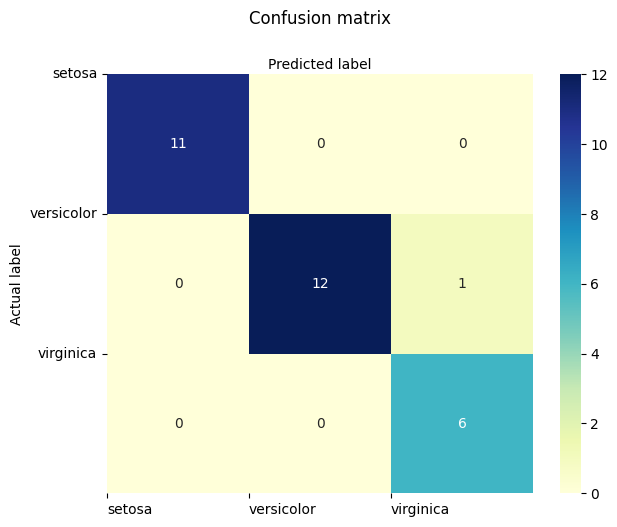

In [15]:
from sklearn import metrics

# Fungsi untuk menghitung confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

### Berikut merupakan kode untuk memproduksi heatmap visualisasi confusion matrix

# Tuliskan label dari masing-masing kelas sesuai urutan
class_names= ["setosa", "versicolor",  "virginica"]

# Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, ha="left")
plt.yticks(tick_marks, class_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Menampilkan Ukuran Performansi Klasifikasi

Dalam klasifikasi multi kelas, ukuran performasi seperti Accuracy, Precision, Recall, dan F1 dihitung nilainya untuk setiap label/kelas dari klasifikasi. Dengan demikian, ukuran performansi hasil model klasifikasi untuk suatu kelas mungkin bisa berbeda dibading ukuran untuk kelas lainnya.

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Membuat kesimpulan akhir

Saat ditest, model paling unggul dalam menebak jenis "sentosa". Model masih perlu dilatih dengan data sample untuk jenis "virginica" karena jenis ini pulang sedikit jumlah support dan buruk akurasinya

### Klasifikasi dataset biji kedelai

In [17]:
# dataset drybeans
data = pd.read_csv('Dry_Beans_Dataset.csv')
display(data)

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [39]:
from sklearn.model_selection import train_test_split

X = data.drop(["Class"], axis = 1)
y = data["Class"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
display(X_train)
display(y_train)

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
2663,2664,69112,1103.241,396.140798,223.268240,1.774282,0.826042,70526,296.641419,0.675582,0.979951,0.713547,0.748828,0.005732,0.001112,0.560744,0.994917
7648,7649,38509,733.994,272.173897,180.771739,1.505622,0.747575,38979,221.429857,0.763295,0.987942,0.898229,0.813560,0.007068,0.001910,0.661880,0.996541
7480,7481,35734,704.049,255.609616,178.903958,1.428753,0.714230,36235,213.302466,0.718705,0.986174,0.905911,0.834485,0.007153,0.002140,0.696366,0.994935
3339,3340,96319,1252.315,434.980462,283.482724,1.534416,0.758465,98108,350.195888,0.748731,0.981765,0.771782,0.805084,0.004516,0.001170,0.648161,0.994548
4179,4180,67844,1014.851,390.126383,225.082546,1.733259,0.816781,69449,293.907577,0.696529,0.976890,0.827783,0.753365,0.005750,0.001143,0.567559,0.983727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,906,38653,713.967,250.195543,196.972511,1.270205,0.616603,38972,221.843477,0.772303,0.991815,0.952877,0.886680,0.006473,0.002468,0.786202,0.998638
5192,5193,83287,1109.766,432.876449,246.319533,1.757378,0.822317,83902,325.644441,0.760140,0.992670,0.849815,0.752280,0.005197,0.001027,0.565926,0.994545
12172,12173,33221,672.871,249.406872,169.896424,1.467994,0.732096,33567,205.665483,0.761112,0.989692,0.922059,0.824618,0.007508,0.002141,0.679995,0.998229
235,236,34676,668.424,226.447507,195.193788,1.160116,0.506938,34982,210.121047,0.777907,0.991253,0.975292,0.927902,0.006530,0.002986,0.861002,0.998862


2663     BARBUNYA
7648         SIRA
7480         SIRA
3339     BARBUNYA
4179         CALI
           ...   
905         SEKER
5192         CALI
12172    DERMASON
235         SEKER
13349    DERMASON
Name: Class, Length: 10888, dtype: object

In [42]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
logreg = LogisticRegression(random_state = 0)

# Performing the model building
logreg.fit(X_train, y_train)

# Predicting the labels of the test dataset
y_pred=logreg.predict(X_test)

# Comparing the true labels vs predicted labels
compare = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
display(compare)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_true,y_pred
10057,SIRA,SIRA
13354,DERMASON,DERMASON
13141,DERMASON,DERMASON
8634,SIRA,SIRA
12579,DERMASON,DERMASON
...,...,...
10130,DERMASON,DERMASON
4119,CALI,CALI
7547,SIRA,SIRA
2625,BARBUNYA,BARBUNYA


In [43]:
# Tuliskan label dari masing-masing kelas sesuai urutan
class_names = data["Class"].unique()
class_names = np.sort(class_names)
class_names

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

Text(0.5, 427.9555555555555, 'Predicted label')

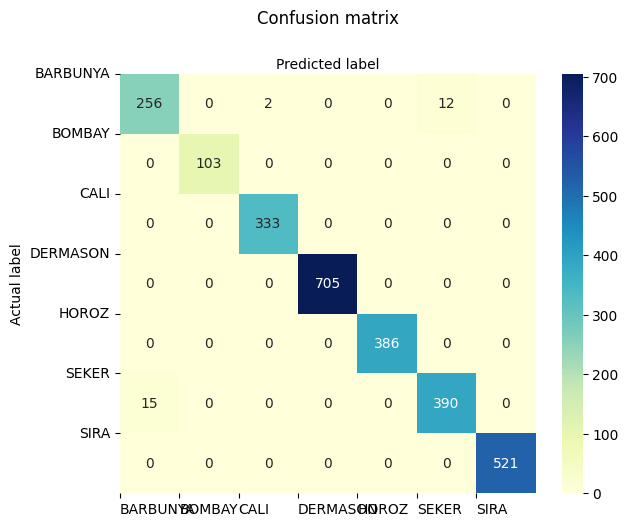

In [44]:
from sklearn import metrics

# Fungsi untuk menghitung confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels = class_names)

### Berikut merupakan kode untuk memproduksi heatmap visualisasi confusion matrix

# Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, ha="left")
plt.yticks(tick_marks, class_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.95      0.95       270
      BOMBAY       1.00      1.00      1.00       103
        CALI       0.99      1.00      1.00       333
    DERMASON       1.00      1.00      1.00       705
       HOROZ       1.00      1.00      1.00       386
       SEKER       0.97      0.96      0.97       405
        SIRA       1.00      1.00      1.00       521

    accuracy                           0.99      2723
   macro avg       0.99      0.99      0.99      2723
weighted avg       0.99      0.99      0.99      2723



## Membuat kesimpulan akhir

### Isi Penjelasan Kesimpulan Akhir Disini:........................................... ###

Jika support (jumlah data) dari suatu class banyak, model lebih cenderung untuk unggul dalam menebak class tersebut.

Saat ditest, salah satu class dimana model unggul menebak adalah "Dermason". Model masih perlu dilatih dengan data sample untuk jenis "bombay" dan "barbunya" karena jenis ini masih sedikit jumlah support. Class "bombay" masih harus diuji dengan data test yang lain, hal ini untuk memastikan bahwa nilai f1-score-nya yang tinggi tidak hanya berlaku untuk test sebelumnya.